In [221]:
import pandas as pd
import numpy as np
# We should see the distribution of the numeric data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [222]:
#Pre Processing
data_path="bank-additional-full.csv"
df=pd.read_csv(data_path,sep=";")

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [224]:
df.describe

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [225]:
#Dealing with Missing Values¶

In [226]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [227]:
df.reset_index(inplace=True,drop=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [228]:
df.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [229]:
df.drop("default",inplace=True,axis=1)

In [230]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [231]:
#Exploratory Data Analysis and Pre-Processing¶

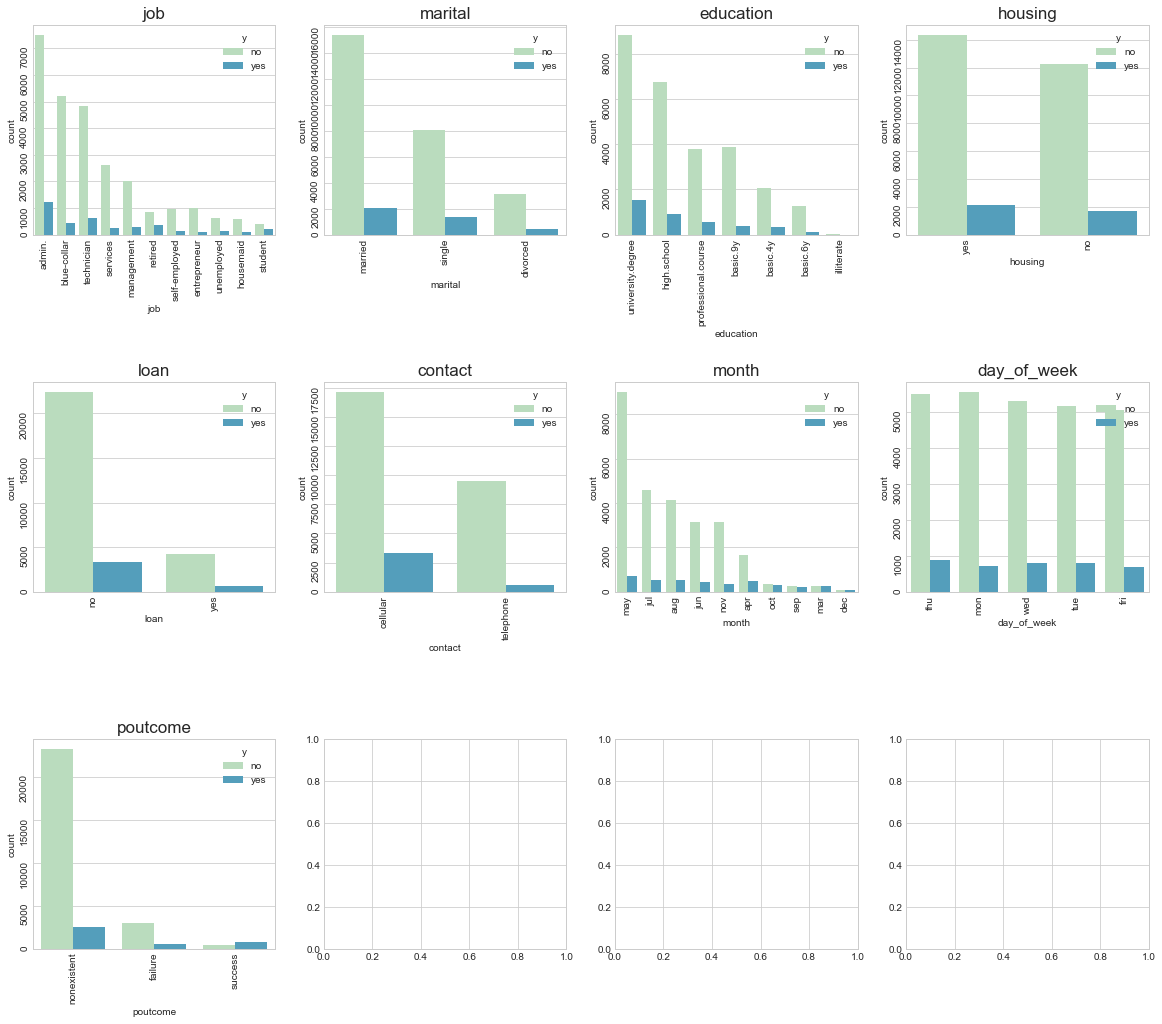

In [232]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [233]:
# We encounter with an imbalanced data.

In [234]:
#For the education feature, there are some similar values like basic.9y, basic.6y and basic.4y. I convert them to "middle.shool"

In [235]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      10412
middle.school           8045
high.school             7699
professional.course     4321
illiterate                11
Name: education, dtype: int64

In [236]:
#In poutcome feature, there is also a problem with missing value, but since it is too much data, I convert them to 0.

In [237]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [238]:
# binary if were was an outcome of marketing campane
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

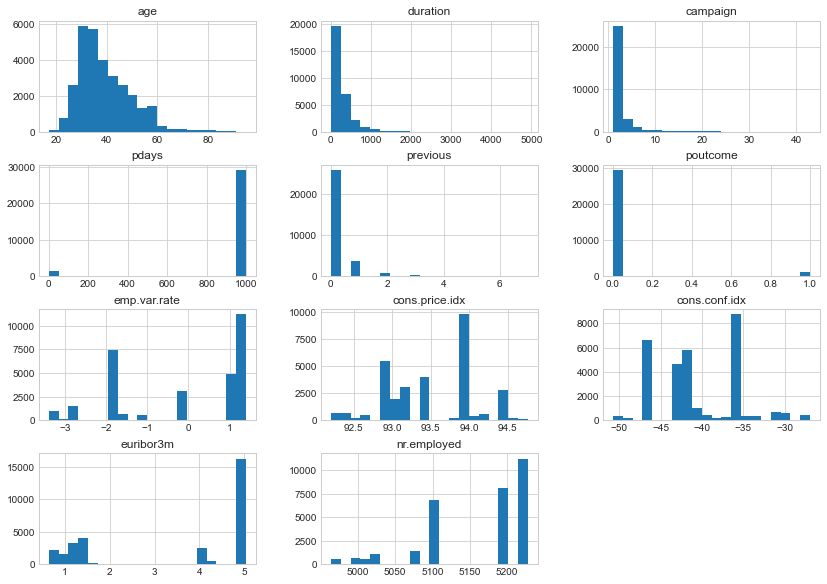

In [239]:
df.hist(bins=20, figsize=(14,10))
plt.show()

In [240]:
df.describe()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,0.039065,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,0.193752,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [241]:
#Age range, from 18 to 95 years old. However, a majority of age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

In [242]:
#'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' don't show any apparent distribution

In [243]:
#There is also a issue in pdays feature. if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted

In [244]:
df.pdays.value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [245]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [246]:
df.pdays.value_counts()

0     29192
3       381
6       363
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

In [247]:
df.previous.value_counts()

0    25836
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64

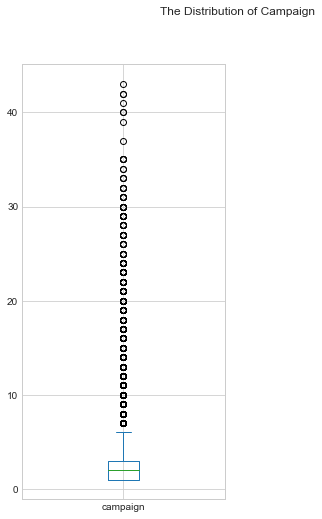

In [248]:
df[['campaign']].plot(kind = 'box', 
                                              figsize = (8,8),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaign')
plt.show()

In [249]:
# Most clients have been reached by the bank for one to three times, which is reasonable.
# However, some clients have been contacted by as high as 58 times, which is not normal.

In [250]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

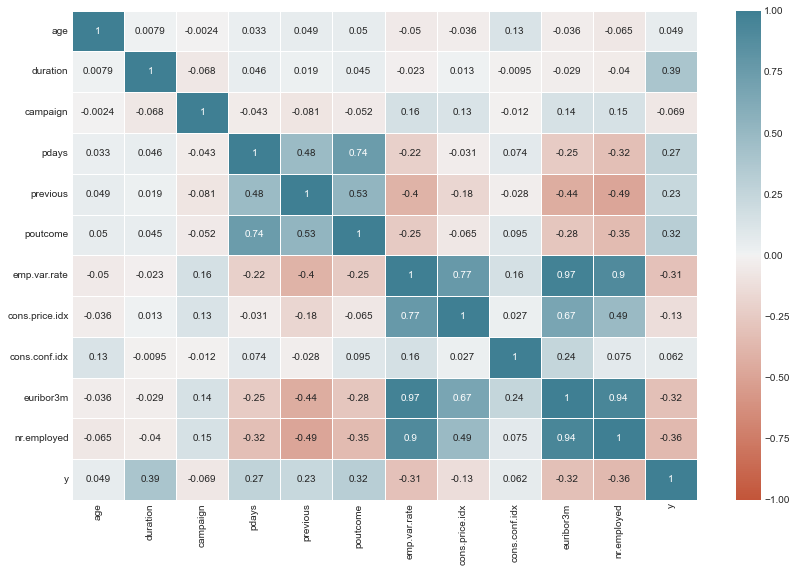

In [251]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [252]:
#Since pdays and previous features are correlated, I convert previous feature to categorical feature.

In [253]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') 
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,middle.school,no,no,telephone,may,mon,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,middle.school,no,no,telephone,may,mon,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [254]:
#Encoding the remaining features
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [255]:
df.count()

age               30488
job               30488
marital           30488
education         30488
housing           30488
loan              30488
contact           30488
month             30488
day_of_week       30488
duration          30488
campaign          30488
pdays             30488
previous          30488
poutcome          30488
emp.var.rate      30488
cons.price.idx    30488
cons.conf.idx     30488
euribor3m         30488
nr.employed       30488
y                 30488
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

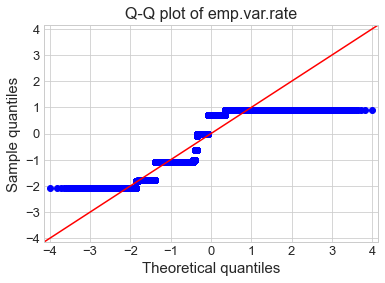

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

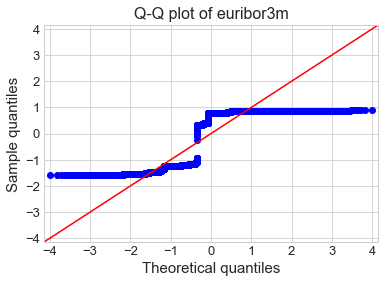

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

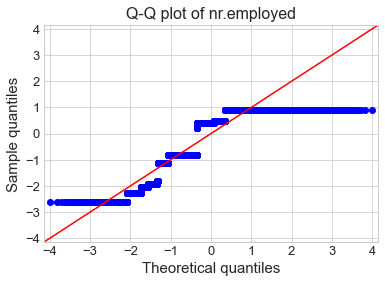

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

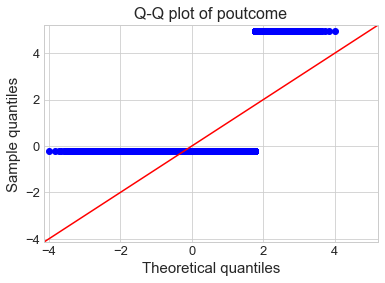

In [256]:
#checking the distribution of independent variables
#Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['emp.var.rate','euribor3m','nr.employed', 'poutcome']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [257]:
#Outliers Removal
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
#IQR = Q3 - Q1 I tried IQR method but it's returing me with nan, so I opted manually 
#to remove outliers less than 5 persentile and more than 95 percentile.

#data2 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df[~((df < (Q1)) |(df> (Q3))).any(axis=1)]

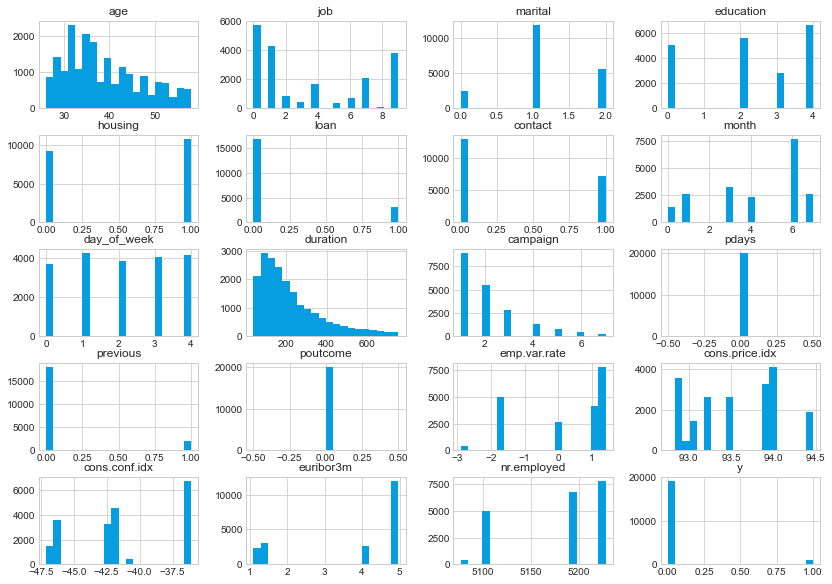

In [258]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

In [259]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,0,0,1,6,1,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,1,0,1,0,1,6,1,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,0,1,2,0,0,1,6,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,1,0,0,1,1,6,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,29,1,2,0,0,1,1,6,1,137,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [260]:
# We don't have any missing value and our dataset is in order. So, we can start with modelling.

In [261]:
# MODELLING

In [262]:
# The goal of classification is to accurately predict the target class for each case in the data

In [263]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [264]:
X = df.iloc[:,df.columns != 'y']
y = df.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [265]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    log_lm = LogisticRegression()
    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
    ##############################
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    dtreequestions = importance(dtree,X)
    ##############################
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    accquestions = importance(rf,X)
    #############################
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(X_train, y_train)
    gbrt_pred=gbrt.predict(X_test)
    accgbrt = accuracy_score(y_test, gbrt_pred)*100
    gbrtaccquestions = importance(gbrt,X)
    #############################
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred=knn.predict(X_test)
    knngbrt = accuracy_score(y_test, knn_pred)*100
    #knnaccquestions = importance(knn)

    # Reporting
    print("Logistic Regression Report in test set")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")
    print("Decision Tree Report in test set")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    print("Random Forest Report in test set")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")
    print("Gradient Boosting in test set")
    print(classification_report(y_test, gbrt_pred))
    print(confusion_matrix(y_test,gbrt_pred))
    print(gbrtaccquestions)
    print("------------------------------------------------------")
    print("K Neighbors in test set")
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    #print(knnaccquestions)
    print("------------------------------------------------------")

In [266]:
def importance(model,X):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [267]:
ML_training(X,y)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3802
           1       0.53      0.17      0.25       209

    accuracy                           0.95      4011
   macro avg       0.74      0.58      0.61      4011
weighted avg       0.93      0.95      0.94      4011

[[3771   31]
 [ 174   35]]
          features       Coef
3        education  20.901462
15  cons.price.idx  13.527266
16   cons.conf.idx   8.397942
2          marital   4.062173
8      day_of_week   3.973967
9         duration   0.796672
5             loan   0.096087
11           pdays   0.000000
13        poutcome   0.000000
18     nr.employed  -0.255299
4          housing  -0.265483
0              age  -1.014547
1              job  -1.129207
6          contact  -4.168653
12        previous  -4.442488
10        campaign  -7.627041
7            month -17.649520
17       euribor3m -30.084015
14    emp.var.rate -39.899612
-------

In [268]:
#As I already seen in correlation plot, duration feature is highly correlated and has to be removed from modelling.

In [269]:
#As you can see models can not able to predict "yes" value in target feature.
# it could be about imbalanced dataset or about some features like duration

In [270]:
#Balanced Dataset without Feature Selection
print("Unbalanced Data shape", len(df))
datano = df[df.y == 0]
datayes = df[df.y == 1]
balanced_df = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_df))

Unbalanced Data shape 20053
Balanced data shape: 1886


In [271]:
balanced_df.y.value_counts()

0    943
1    943
Name: y, dtype: int64

In [272]:
balanced_df.reset_index(inplace=True,drop=True)

In [273]:
X_balanced = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced = balanced_df.y
print("X Columns: ",list(X_balanced.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [274]:
ML_training(X_balanced,y_balanced)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       191
           1       0.85      0.85      0.85       187

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

[[162  29]
 [ 28 159]]
          features       Coef
3        education  27.099774
15  cons.price.idx  16.187882
16   cons.conf.idx  10.876769
2          marital   4.550096
8      day_of_week   3.279208
1              job   1.700421
9         duration   1.042683
13        poutcome   0.000000
11           pdays   0.000000
18     nr.employed  -0.240409
5             loan  -0.872362
10        campaign  -0.908011
0              age  -1.130644
4          housing  -1.635735
12        previous  -3.427856
6          contact  -6.793910
7            month -22.036057
17       euribor3m -38.628633
14    emp.var.rate -51.129262
-----------

In [275]:
# As you can see in the balanced dataset results, our precision and recall results quite similar. 
# so our model can also predict well to "yes" values in target feature.
#Still duration feature is highly dominant in every model.

In [276]:
# Balanced Data with Some Feature Scaling¶

In [277]:
# change the range of Var Rate
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'] * -1
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# Multiply consumer index 
balanced_df['cons.price.idx'] = (balanced_df['cons.price.idx'] * 10).astype('uint8')

# change the sign (we want all be positive values)
balanced_df['cons.conf.idx'] = balanced_df['cons.conf.idx'] * -1

# re-scale variables
balanced_df['nr.employed'] = np.log2(balanced_df['nr.employed']).astype('uint8')
balanced_df['cons.price.idx'] = np.log2(balanced_df['cons.price.idx']).astype('uint8')
balanced_df['cons.conf.idx'] = np.log2(balanced_df['cons.conf.idx']).astype('uint8')

In [278]:
X_balanced_scaled = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced_scaled = balanced_df.y
print("X Columns: ",list(X_balanced_scaled.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [279]:
ML_training(X_balanced_scaled,y_balanced_scaled)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       191
           1       0.83      0.82      0.82       187

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378

[[159  32]
 [ 34 153]]
          features       Coef
3        education  22.202336
2          marital  13.655765
8      day_of_week   6.263937
10        campaign   3.624474
1              job   2.037071
9         duration   1.014510
13        poutcome   0.000000
11           pdays   0.000000
0              age  -0.639470
16   cons.conf.idx  -2.346046
15  cons.price.idx  -3.284465
6          contact  -4.133611
5             loan  -4.860316
18     nr.employed  -5.630511
14    emp.var.rate -11.335425
4          housing -12.380770
7            month -18.534514
12        previous -28.193051
17       euribor3m -54.605661
-----------

In [280]:
#Scaled dataset does not improved the score.

In [281]:
#Random Forest Classifer perform best so for. Let's build a model for Random Forest with some hyperparameters.

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size = 0.20, random_state = 0)

In [283]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [284]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)

In [285]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [286]:
rf_Grid.best_params_

{'max_depth': 23,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 155}

In [287]:
rf = RandomForestClassifier(n_estimators=155,max_depth=45, max_features="auto", min_samples_split=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of Random Forest classifier on test set: 0.88


In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[162  29]
 [ 18 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       191
           1       0.85      0.90      0.88       187

    accuracy                           0.88       378
   macro avg       0.88      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378



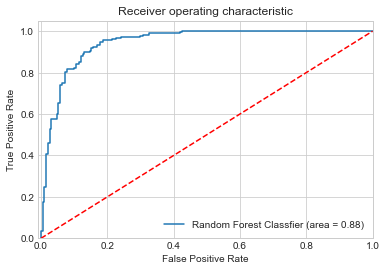

In [289]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classfier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [290]:
# Feature importance with LOFO (Leave One Feature Out)¶

In [291]:
# LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice.
# for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model
# with a validation scheme of choice, based on the chosen metric.

In [292]:
!pip install lofo-importance

In [293]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

  0%|          | 0/19 [00:00<?, ?it/s]

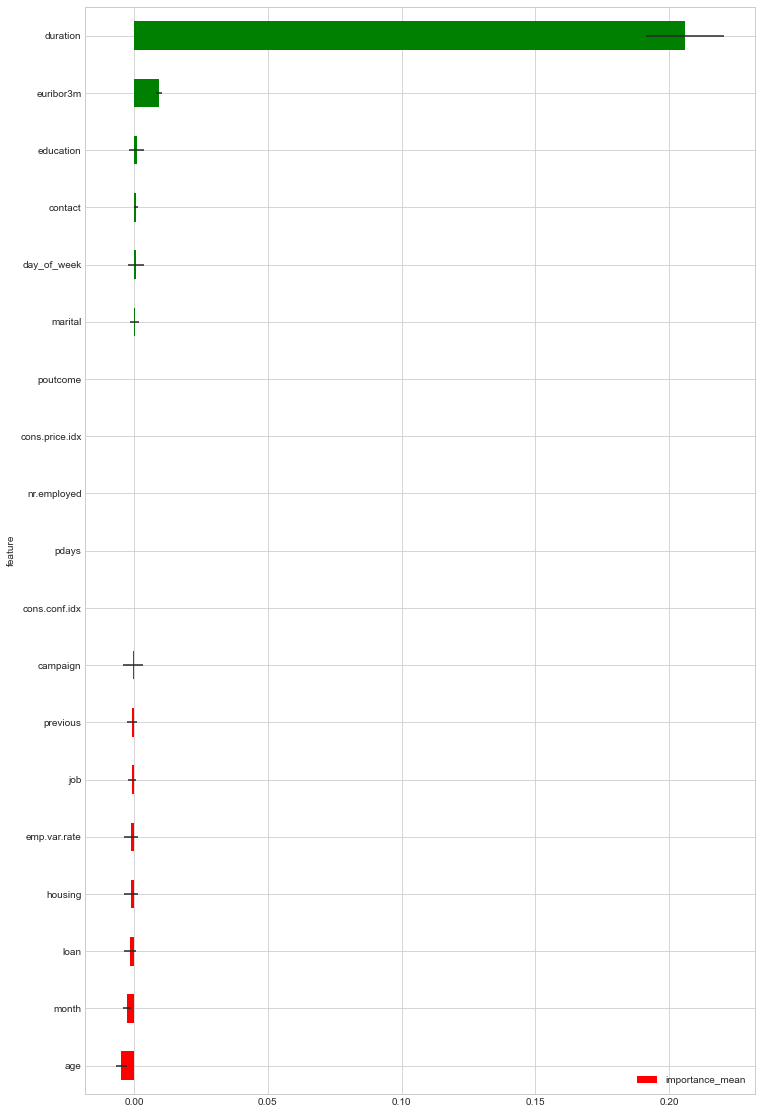

In [294]:
cv = KFold(n_splits=4, shuffle=True, random_state=0)

# define the binary target and the features
dataset = Dataset(df=balanced_df, target="y", features=[col for col in balanced_df.columns if col != "y"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))